# Data Transformation of training and testing data

In [73]:
from sklearn.datasets import make_friedman1
import numpy as np
import matplotlib.pyplot as plt

## Transformation only on test set

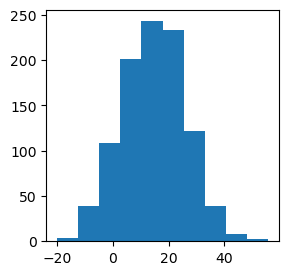

In [100]:
# without any transformation
X_test, y_test = make_friedman1(n_samples=1000, n_features=10, noise=10, random_state=1)
min_y_test = min(y_test)

fig, axs = plt.subplots(figsize=(3, 3))
plt.hist(y_test)
plt.show()

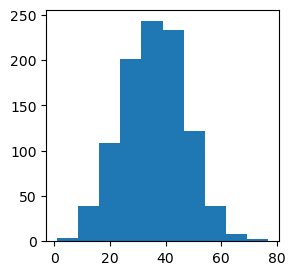

In [101]:
# shift test data
y_shifted = y_test - min_y_test + 1.00000001

# plot y_test
fig, axs = plt.subplots(figsize=(3, 3))
plt.hist(y_shifted)
plt.show()

9.999999889225291e-09


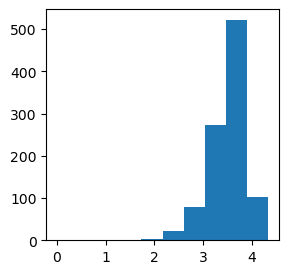

In [102]:
# Transformation: log
y_test_log = np.log(y_shifted)
min_y_test_log = min(y_test_log)
print(min_y_test_log)

# plot y_test
fig, axs = plt.subplots(figsize=(3, 3))
plt.hist(y_test_log)
plt.show()

## Relation n_samples and value range
The more samples we sample from friedman, the higher is the value range.

 n_samples = 100, min_y_test = -21.031220350339687, max_y_test = 45.988172012534534, value_range = 67.01939236287421
 n_samples = 1000, min_y_test = -20.092176210610162, max_y_test = 55.75164736040433, value_range = 75.8438235710145
 n_samples = 10000, min_y_test = -27.370305999509668, max_y_test = 53.42337405812327, value_range = 80.79368005763294
 n_samples = 100000, min_y_test = -34.66241344987967, max_y_test = 58.444854248270815, value_range = 93.10726769815048


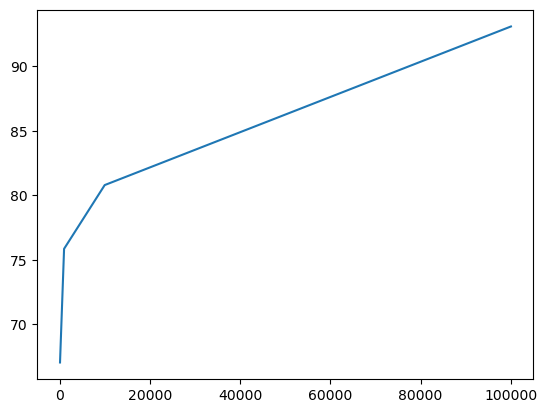

In [103]:
value_range_n_samples = []
n_samples_levels = [100, 1000, 10000, 100000]
for n_samples in n_samples_levels:
    X_test, y_test = make_friedman1(n_samples=n_samples, n_features=10, noise=10, random_state=1)
    min_y_test = min(y_test)
    max_y_test = max(y_test)
    print(f" n_samples = {n_samples}, min_y_test = {min_y_test}, max_y_test = {max_y_test}, value_range = {max_y_test - min_y_test}")
    value_range_n_samples.append(max_y_test - min_y_test)


plt.plot(n_samples_levels, value_range_n_samples)
plt.show()


## Relation noise and value range
The higher the noise, the higher is the value range.

 noise = 0, min_y_test = 2.348039772245312, max_y_test = 26.542451179536272,  value_range = 24.19441140729096
 noise = 0.5, min_y_test = 2.6016786724760568, max_y_test = 26.65351896302771,  value_range = 24.051840290551652
 noise = 5, min_y_test = -4.489508258061578, max_y_test = 37.685262324988585,  value_range = 42.17477058305016
 noise = 10, min_y_test = -20.092176210610162, max_y_test = 55.75164736040433,  value_range = 75.8438235710145
 noise = 20, min_y_test = -52.28349726684858, max_y_test = 91.8844174312358,  value_range = 144.1679146980844


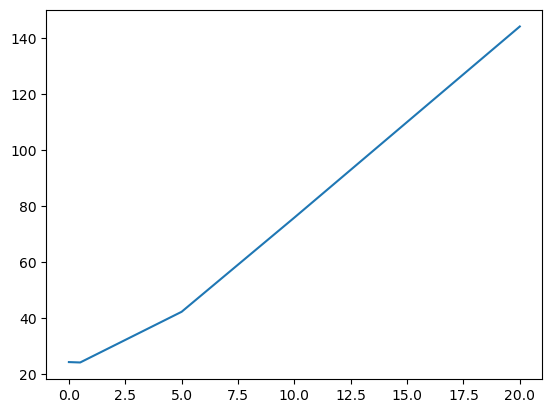

In [104]:
value_range_n_noise = []
noise_levels = [0, 0.5, 5, 10, 20]

for noise in noise_levels:
    X_test, y_test = make_friedman1(n_samples=1000, n_features=10, noise=noise, random_state=1)
    min_y_test = min(y_test)
    max_y_test = max(y_test)
    value_range_n_noise.append(max_y_test - min_y_test)
    print(f" noise = {noise}, min_y_test = {min_y_test}, max_y_test = {max_y_test},  value_range = {max_y_test - min_y_test}")

plt.plot(noise_levels, value_range_n_noise)
plt.show()

## Transforming train and test data with logarithm

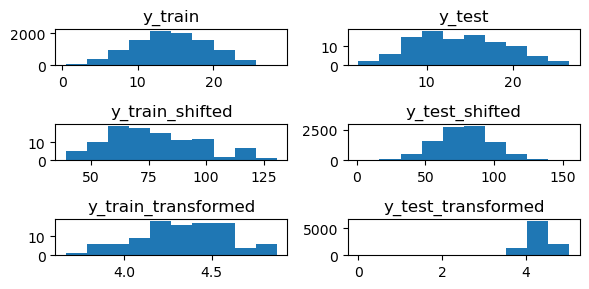

min_y_train: 2.053748953305834
min_y_test: 0.4779348212857602
min_data: 0.4779348212857602


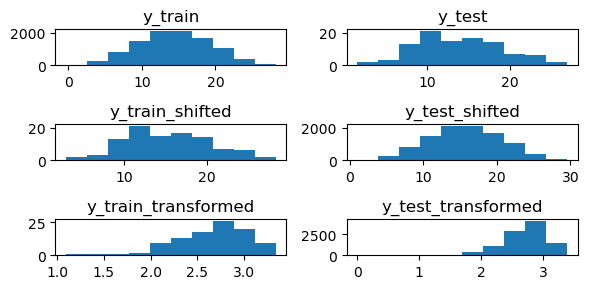

min_y_train: 1.6106393907304006
min_y_test: -0.3648881167320533
min_data: -0.3648881167320533


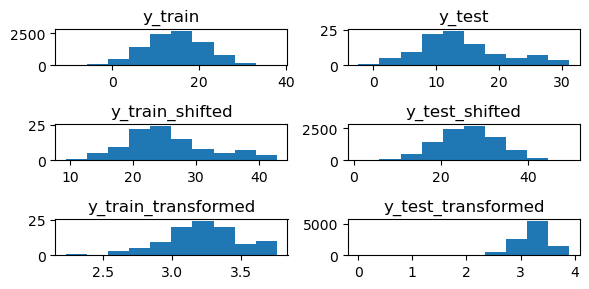

min_y_train: -2.377346672448499
min_y_test: -10.696757896008773
min_data: -10.696757896008773


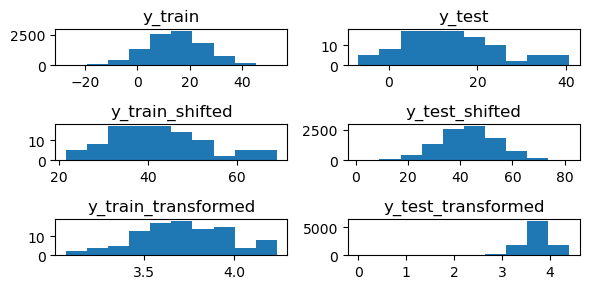

min_y_train: -6.808442298202832
min_y_test: -27.370305999509668
min_data: -27.370305999509668


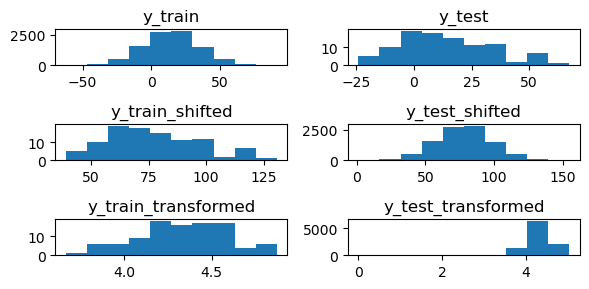

min_y_train: -24.149804269944035
min_y_test: -62.21186159185214
min_data: -62.21186159185214


In [111]:
for noise in [0, 0.5, 5, 10, 20]:
    fig, axs = plt.subplots(3, 2, figsize=(6, 3))
    X_test, y_test = make_friedman1(n_samples=10000, n_features=10, noise=noise, random_state=1)
    min_y_test = min(y_test)

    axs[0, 0].hist(y_test)
    axs[0, 0].set_title('y_train')

    X_train, y_train = make_friedman1(n_samples=100, n_features=10, noise=noise, random_state=2)

    axs[0, 1].hist(y_train)
    axs[0, 1].set_title('y_test')

    min_y_train = min(y_train)
    min_data = min(min_y_train, min_y_test)

    if min_data < 0:
        shifiting = abs(min_data) + 1.00000001
        y_train_shifted = y_train + shifiting
        y_test_shifted = y_test + shifiting
        y_train_transformed = np.log(y_train_shifted)
        y_test_transformed = np.log(y_test_shifted)

    axs[1, 0].hist(y_train_shifted)
    axs[1, 0].set_title('y_train_shifted')

    axs[1, 1].hist(y_test_shifted)
    axs[1, 1].set_title('y_test_shifted')

    # Add histograms of y_train_shifted and y_test_shifted to the grid
    axs[2, 0].hist(y_train_transformed)
    axs[2, 0].set_title('y_train_transformed')

    axs[2, 1].hist(y_test_transformed)
    axs[2, 1].set_title('y_test_transformed')

    plt.tight_layout()
    plt.show()

    print(f"min_y_train: {min_y_train}")
    print(f"min_y_test: {min_y_test}")
    print(f"min_data: {min_data}")


In [125]:
def generate_data(n_samples_training =100, n_samples_test= 10000, noise = 0, n_features = 10, random_state_trainning = 1, transformation='log'):
    X_test, y_test = make_friedman1(n_samples=n_samples_test, n_features=n_features, noise=noise, random_state=1781)
    X_train, y_train = make_friedman1(n_samples=n_samples_training, n_features=n_features, noise=noise, random_state=random_state_trainning)
    min_y_test = min(y_test)
    min_y_train = min(y_train)
    min_data = min(min_y_train, min_y_test)

    if min_data < 0:
        y_train = transform(y_train, transformation, shifting=abs(min_data))
        y_test = transform(y_test, transformation='log', shifting=abs(min_data))
        print(y_train)
    return X_train, y_train_transformed, X_test, y_test_transformed


def transform(y, transformation='log', shifting=0):
        '''
        Function to transform the target variable.
        Inputs:
            transformation: the transformation to be applied
        Outputs:
            None (it transforms the target variable of the dataframe and of y itself)
        '''

        if transformation == 'identity':
            pass
        elif transformation == 'log':
            if shifting >0:
                 shifting = shifting + 1.00000001
            y = np.log(y + shifting)
        elif transformation == 'sqrt':
            y = np.sqrt(y + shifting)
        else:
            raise ValueError('Transformation not implemented.')
        return y

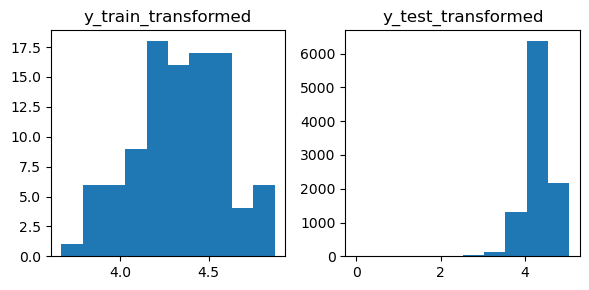

In [126]:
X_train, y_train_transformed, X_test, y_test_transformed = generate_data(n_samples_training =100, n_samples_test= 10000, noise = 0, n_features = 10, random_state_trainning = 1, transformation='sqrt')


#plot y_train_transformed and y_test_transformed
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].hist(y_train_transformed)
axs[0].set_title('y_train_transformed')

axs[1].hist(y_test_transformed)
axs[1].set_title('y_test_transformed')

plt.tight_layout()
plt.show()